# Acquire Zillow

## For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

## You will have a zillow.ipynb file and a helper file for each section in the pipeline.

* Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe.

* Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

* Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

* Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
* Only include properties that include a latitude and longitude value.

In [1]:
from env import user, host, password
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
def get_connection(database, user=user, host=host, password=password):
    
    return f"mysql+pymysql://{user}:{password}@{host}/{database}"

In [3]:
def cache_sql_data(df, database):
    
        df.to_csv(f'{database}_query.py',index = False)

In [4]:
def get_sql_data(database,query):
    
    if os.path.isfile(f'{database}_query.py') == False:
        
        df = pd.read_sql(query, get_connection(database))
        
        cache_sql_data(df, database)
        
    return pd.read_csv(f'{database}_query.py')

In [5]:
query = '''

select * 
from predictions_2017

left join properties_2017 using(parcelid)

left join airconditioningtype using(airconditioningtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)

where (parcelid, transactiondate) in (select parcelid, max(transactiondate)
                                      from predictions_2017
                                      group by parcelid)
and latitude is not null
and longitude is not null

'''

database = "zillow"

In [6]:
# df = get_sql_data(database,query)

# Mall Customers

## notebook

* Acquire data from mall_customers.customers in mysql database.
* Summarize data (include distributions and descriptive statistics).
* Detect outliers using IQR.
* Split data (train, validate, and test split).
* Encode categorical columns using a one hot encoder (pd.get_dummies).
* Handles missing values.
* Scaling

In [7]:
database = "mall_customers"

query = "select * from customers"

In [8]:
df = get_sql_data(database,query)

In [9]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# drop customer ID
df = df[['gender', 'age', 'annual_income', 'spending_score']]
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


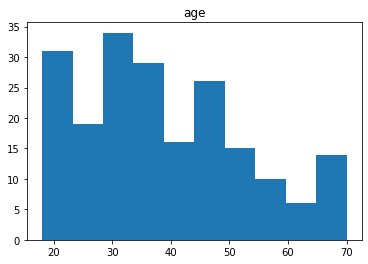

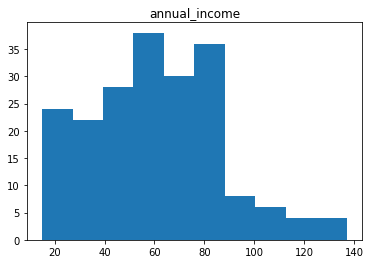

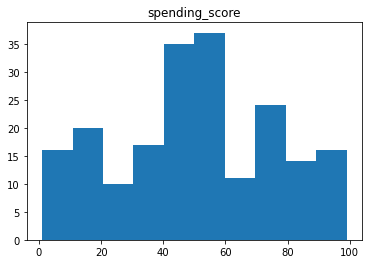

In [15]:
# distribution of the data
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:title={'center':'Gender Distribution'}>

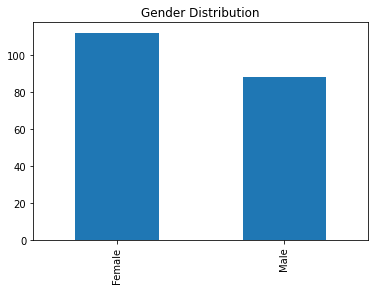

In [21]:
df['gender'].value_counts().plot(kind='bar', title = "Gender Distribution")